## Plotting with Pandas

In [1]:
import numpy as np
import pandas as pd

### Basic Plotting: plot

In [2]:
df = pd.read_csv('data/sampleData2.csv',parse_dates=['Date'],index_col='Date')
df

,Month,Year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
Date,,,,,,,,,,,,,,,,,,
2013-11-26,November,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
2015-11-26,November,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590
2014-03-23,March,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366
2016-03-23,March,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188
2014-05-15,May,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-12,April,2016,29443,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",NaN,3,24,64,72,184,112
2014-04-02,April,2014,29462,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",NaN,22,24,64,528,1183,655
2016-04-02,April,2016,29462,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",NaN,22,24,64,528,1183,655


Total Revenue from 2011 to 2016

AxesSubplot(0.125,0.125;0.775x0.755)
Year
2011     8964888
2012     9175983
2013    15240037
2014    14152724
2015    20023991
2016    17713385
Name: Revenue, dtype: int64


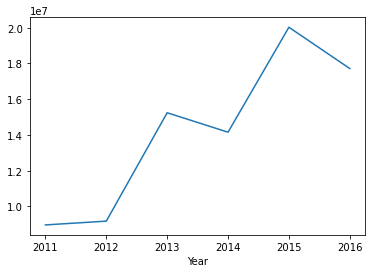

In [3]:
print('Total Revenue from 2011 to 2016\n')
print(df.groupby('Year').Revenue.agg(np.sum).plot())
print(df.groupby('Year').Revenue.agg(np.sum))

Weeky Revenue from 2011 to 2016

AxesSubplot(0.125,0.125;0.775x0.755)


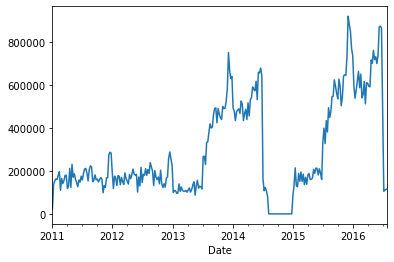

In [4]:
print('Weeky Revenue from 2011 to 2016\n')

print(df.Revenue.resample('W').sum().plot())

United States and Canada Weekly Profit
AxesSubplot(0.125,0.125;0.775x0.755)


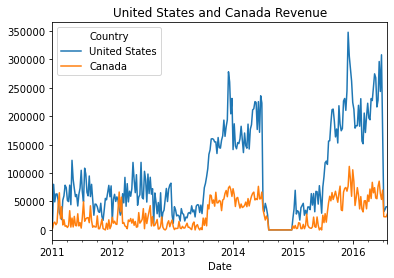

In [6]:
print('United States and Canada Weekly Profit')

print(df.pivot_table(index='Date',columns=['Country'],aggfunc='sum',values='Revenue')[['United States','Canada']].resample('W').sum().plot(title='United States and Canada Revenue'))

### Bar Plot

Total Revenue from different Countries
AxesSubplot(0.125,0.125;0.775x0.755)


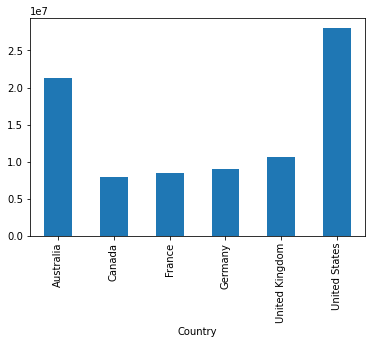

In [7]:
print('Total Revenue from different Countries')

print(df.groupby('Country').Revenue.sum().plot.bar())

Sales count of products from different countries

AxesSubplot(0.125,0.125;0.775x0.755)


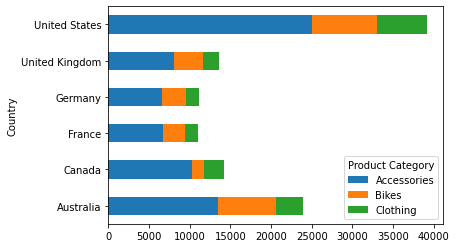

In [8]:
print('Sales count of products from different countries\n')
print(pd.crosstab(index=df['Country'],columns=df['Product Category']).plot.barh(stacked=True))

### Histograms

Frequency Distribution by Customer Age

AxesSubplot(0.125,0.125;0.775x0.755)


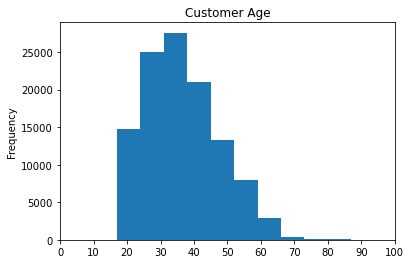

In [9]:
print('Frequency Distribution by Customer Age\n')

print(df['Customer Age'].plot.hist(title='Customer Age',xticks=np.arange(0,101,10)))

[[<AxesSubplot:title={'center':'Column1'}>
  <AxesSubplot:title={'center':'Column2'}>]
 [<AxesSubplot:title={'center':'Column3'}>
  <AxesSubplot:title={'center':'Column4'}>]]
    Column1  Column2  Column3  Column4
0         2        4        1        5
1         1        4        2        4
2         3        2        3        3
3         1        5        1        5
4         5        5        5        2
5         5        5        3        1
6         1        4        4        4
7         1        3        5        5
8         2        2        3        5
9         2        1        2        2
10        1        1        5        5
11        3        5        4        3
12        1        2        5        4
13        3        5        3        1
14        4        3        4        2
15        5        2        1        4
16        4        5        1        4
17        2        5        5        3
18        2        4        3        1
19        5        4        1        3


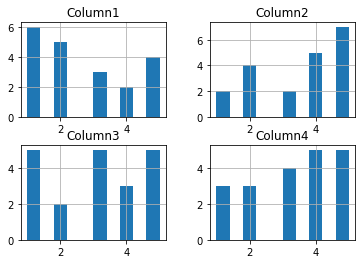

In [12]:
hist = pd.DataFrame(np.random.randint(1,6,(20,4)),columns=np.char.add(['Column'],['1','2','3','4']))

print(hist.hist())
print(hist)

### Area Plot

AxesSubplot(0.125,0.125;0.775x0.755)


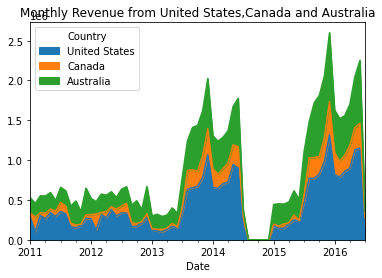

In [15]:
print(df.pivot_table(index='Date',columns=['Country'],aggfunc='sum',values='Revenue')[['United States','Canada','Australia']].resample('M').sum().plot.area(title='Monthly Revenue from United States,Canada and Australia'))

### Pie Chart

AxesSubplot(0.260833,0.125;0.503333x0.755)


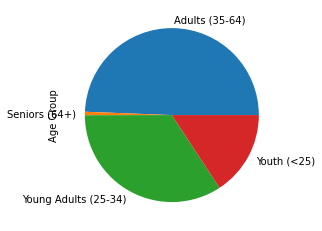

In [16]:
print(df.groupby('Age Group')['Age Group'].count().plot.pie())

### Scatter Plot

<AxesSubplot:xlabel='Customer Age', ylabel='Order Quantity'>

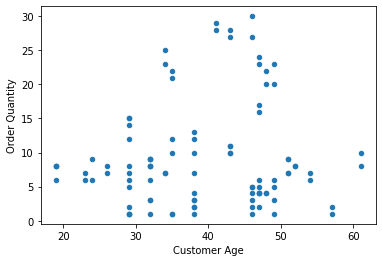

In [18]:
df.head(100).plot.scatter(x='Customer Age',y='Order Quantity')

AxesSubplot(0.125,0.125;0.775x0.755)


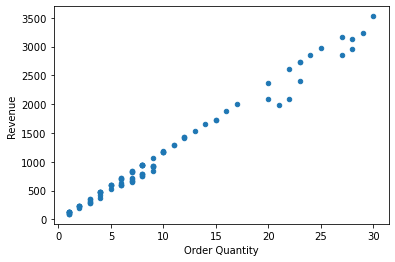

In [19]:
print(df.head(100).plot.scatter(x='Order Quantity',y='Revenue'))

AxesSubplot(0.125,0.125;0.62x0.755)


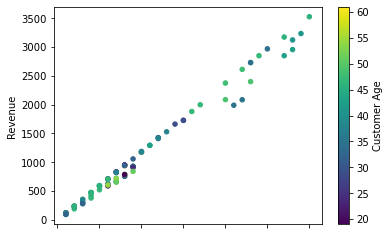

In [20]:
print(df.head(100).plot.scatter(x='Order Quantity',y='Revenue',c='Customer Age',colormap='viridis'))